In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/students-performance-in-exams/StudentsPerformance.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [3]:
df=pd.read_csv("/kaggle/input/students-performance-in-exams/StudentsPerformance.csv")
df.columns=['gender','race','education','lunch','course','math','reading','writing']

# Categorical Variable distributions

In [4]:
g_counts=pd.value_counts(df['gender']).reset_index()
px.bar(g_counts,x='index',y='gender')

In [5]:
r_counts=pd.value_counts(df['race']).reset_index()
px.bar(r_counts,x='index',y='race')

In [6]:
e_counts=pd.value_counts(df['education']).reset_index()
px.bar(e_counts,x='index',y='education')

In [7]:
l_counts=pd.value_counts(df['lunch']).reset_index()
px.bar(l_counts,x='index',y='lunch')

In [8]:
c_counts=pd.value_counts(df['course']).reset_index()
px.bar(c_counts,x='index',y='course')

**Observations**
1. Marginally more women have attempted the test.
2. Very less students of ethnicity 'groupA' attempted the test and many from groupC took the test.
3. Very less students with masters degree have taken the test.
4. Most people haven't completed the course offered.
5. Almost a 3rd of the students take the reduced lunch.
6. Also, 3rd of the students have completed the course.

# Continuous variable distribution

In [9]:
px.histogram(df,x='math',nbins=100)

In [10]:
px.histogram(df,x='reading',nbins=100)

In [11]:
px.histogram(df,x='writing',nbins=100)

**Observations**
1. The distributions are pretty normal. With a notable few 100/100 scorers in reading and writing.

**Let's compare scoring of subjects two at a time.**

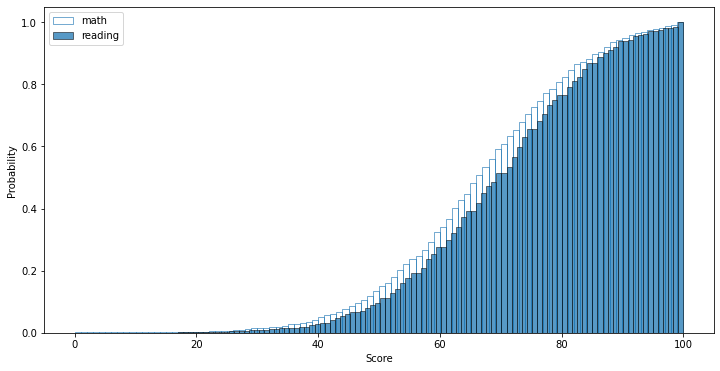

In [12]:
fig=plt.figure(figsize=(12,6))
sns.histplot(x=df['math'],cumulative=True,label='math',stat='probability',fill=False,bins=100)
sns.histplot(x=df['reading'],cumulative=True,label='reading',stat='probability',bins=100)
plt.xlabel("Score")
plt.legend()

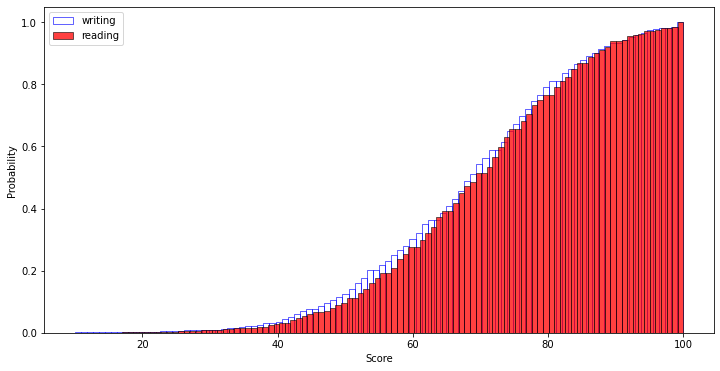

In [13]:
fig=plt.figure(figsize=(12,6))
sns.histplot(x=df['writing'],cumulative=True,label='writing',stat='probability',fill=False,bins=100,color='blue')
sns.histplot(x=df['reading'],cumulative=True,label='reading',stat='probability',bins=100,color='red')
plt.xlabel("Score")
plt.legend()

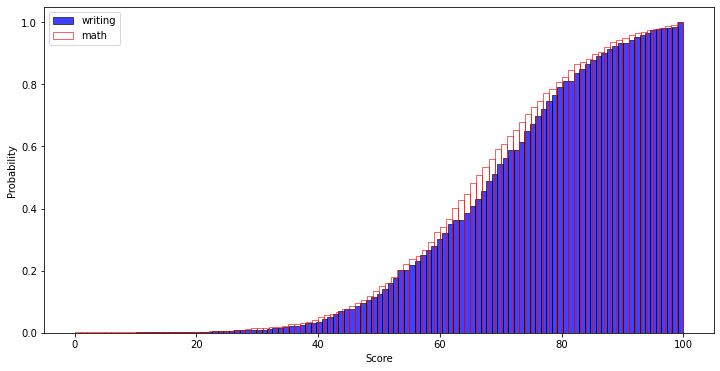

In [14]:
fig=plt.figure(figsize=(12,6))
sns.histplot(x=df['writing'],cumulative=True,label='writing',stat='probability',bins=100,color='blue')
sns.histplot(x=df['math'],cumulative=True,label='math',stat='probability',bins=100,fill=False,color='red')
plt.xlabel("Score")
plt.legend()

In [15]:
df['Average']=(df['math']+df['reading']+df['writing'])/3 #for examining relationship of subject with both the other subjects


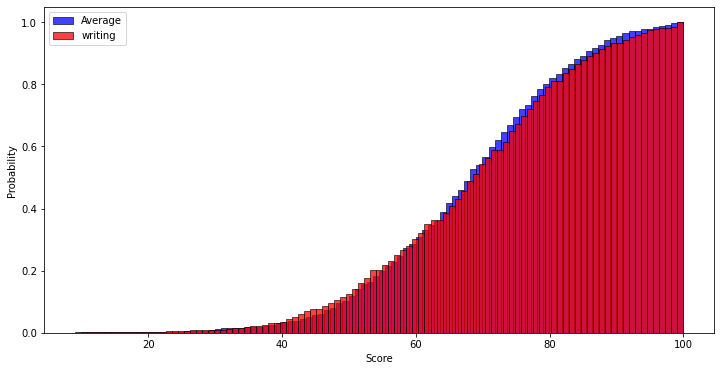

In [16]:
fig=plt.figure(figsize=(12,6))
sns.histplot(x=df['Average'],cumulative=True,label='Average',stat='probability',bins=100,color='blue')
sns.histplot(x=df['writing'],cumulative=True,label='writing',stat='probability',bins=100,color='red')
plt.xlabel("Score")
plt.legend()

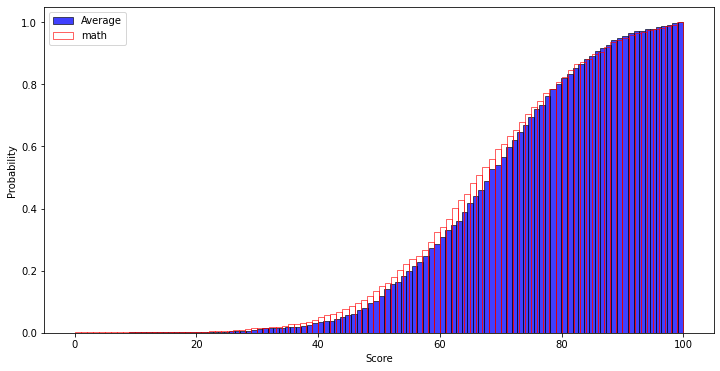

In [17]:
fig=plt.figure(figsize=(12,6))
sns.histplot(x=df['Average'],cumulative=True,label='Average',stat='probability',bins=100,color='blue')
sns.histplot(x=df['math'],cumulative=True,label='math',stat='probability',bins=100,fill=False,color='red')
plt.xlabel("Score")
plt.legend()

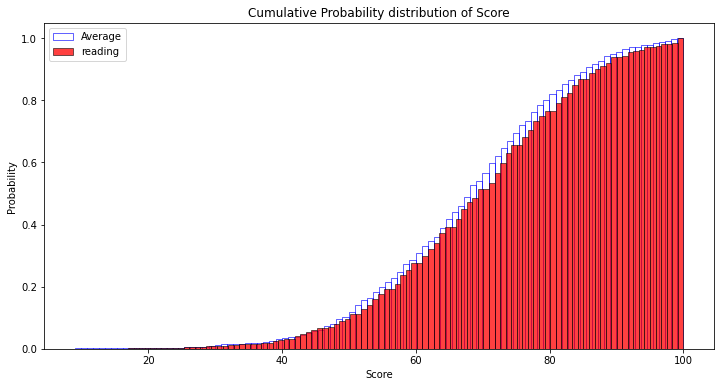

In [18]:
fig=plt.figure(figsize=(12,6))
sns.histplot(x=df['Average'],cumulative=True,label='Average',stat='probability',bins=100,fill=False,color='blue')
sns.histplot(x=df['reading'],cumulative=True,label='reading',stat='probability',bins=100,color='red')
plt.xlabel("Score")
plt.title("Cumulative Probability distribution of Score")
plt.legend()

**Observations**
1. It looks like it is the easiest to score in math as compared to the other subjects.
2. If we score an 80 in reading i.e. almost more than 75% people in the Test, then probability stats that your average is likely to be higher than 80% people. This right here is true for any score of reading.
3. The 2nd point though is not True for math. If you  score a 60 in math (more than 35%) then probability stats that your average is likely to be higher than 30% people.
4. In case of the writing score it almost overlaps with Average => the percentage of people that you scored higher than in writing , you are likely to score higher than that much percentage of people overall.
 
The same analogy can be applied to the plots between 2 subjects as well.


# Relationship between categorical variables

In [19]:
g=df.groupby(['gender','race'])['Average'].agg('count').reset_index()
g.columns=['gender','race','counts']
px.bar(g,x='gender',y='counts',color='race',barmode='group')

In [20]:
g=df.groupby(['gender','education'])['Average'].agg('count').reset_index()
g.columns=['gender','education','counts']
px.bar(g,x='gender',y='counts',color='education',barmode='group')

In [21]:
g=df.groupby(['gender','course'])['Average'].agg('count').reset_index()
g.columns=['gender','course','counts']
px.bar(g,x='gender',y='counts',color='course',barmode='group')

In [22]:
g=df.groupby(['education','course'])['Average'].agg('count').reset_index()
g.columns=['education','course','counts']
px.bar(g,x='education',y='counts',color='course',barmode='group')

In [23]:
g=df.groupby(['race','course'])['Average'].agg('count').reset_index()
g.columns=['race','course','counts']
px.bar(g,x='race',y='counts',color='course',barmode='group')

In [24]:
g=df.groupby(['race','lunch'])['Average'].agg('count').reset_index()
g.columns=['race','lunch','counts']
px.bar(g,x='race',y='counts',color='lunch',barmode='group')

In [25]:
g=df.groupby(['education','lunch'])['Average'].agg('count').reset_index()
g.columns=['education','lunch','counts']
px.bar(g,x='education',y='counts',color='lunch',barmode='group')

**Observationa**
1. There are more females from Group C than their should be.
2. There is not much inter relationship within the categorical variables.

# Relationship between categorical and continuous variables

<AxesSubplot:title={'center':'Education vs Average'}, xlabel='education', ylabel='Average'>

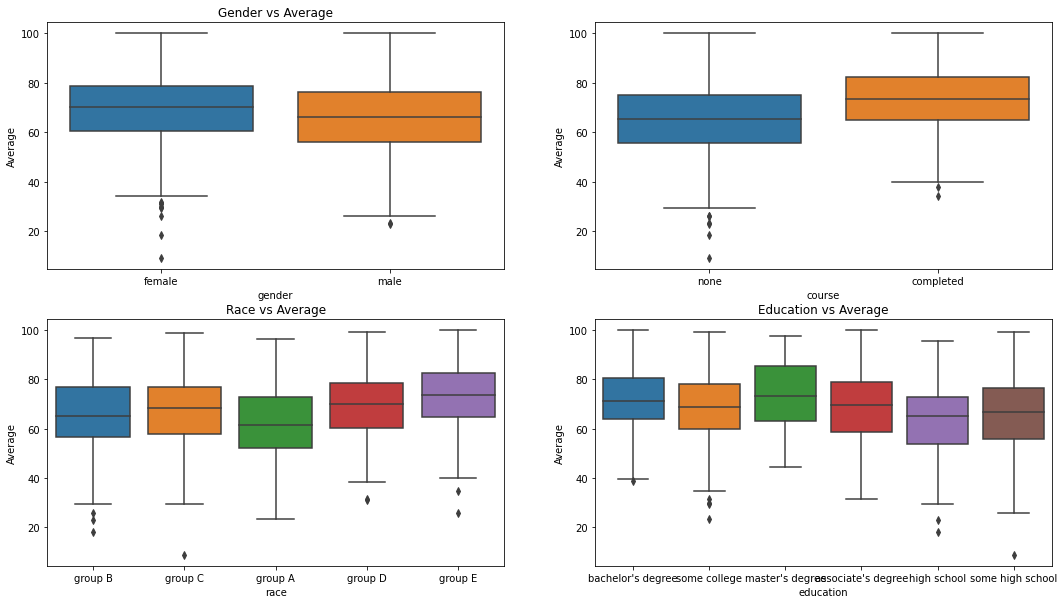

In [26]:
fig=plt.figure(figsize=(18,10))
plt.subplot(2,2,1)
plt.title('Gender vs Average')
sns.boxplot(x=df['gender'],y=df['Average'])
plt.subplot(2,2,2)
sns.boxplot(x=df['course'],y=df['Average'])
plt.subplot(2,2,3)
plt.title("Race vs Average")
sns.boxplot(x=df['race'],y=df['Average'])
plt.subplot(2,2,4)
plt.title("Education vs Average")
sns.boxplot(x=df['education'],y=df['Average'])

**Observations**
1. Students that have a Masters degree have a higher average and minimum score , followed by Students with bachelors degree and associate degree. It looks like having a better level of education helps with the test.
2. People that completed the course have a much higher average score. It can be said that Completing the course gives an assurance of scoring 50-60% marks.

In [27]:
def above_average(x,col):
    if x>=np.mean(df[col]):
        return 1
    return 0
df['math_above_average']=df['math'].apply(lambda x:above_average(x,'math'))

df['reading_above_average']=df['reading'].apply(lambda x:above_average(x,'reading'))

df['writing_above_average']=df['writing'].apply(lambda x:above_average(x,'writing'))
df['average_above_average']=df['Average'].apply(lambda x:above_average(x,'Average'))

<AxesSubplot:title={'center':'Average'}, xlabel='education', ylabel='Percent_above_average'>

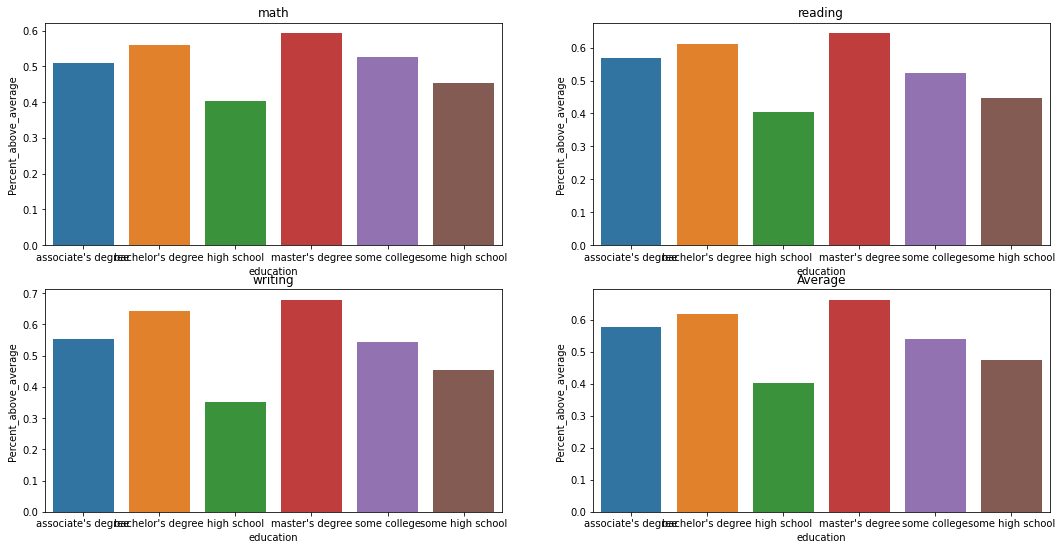

In [28]:
temp=df.groupby('education')['math_above_average'].agg(['sum','count']).reset_index()
temp['Percent_above_average']=temp['sum']/temp['count']
fig=plt.figure(figsize=(18,9))
plt.subplot(2,2,1)
plt.title('math')
sns.barplot(y=temp['Percent_above_average'],x=temp['education'])
temp=df.groupby('education')['reading_above_average'].agg(['sum','count']).reset_index()
temp['Percent_above_average']=temp['sum']/temp['count']
plt.subplot(2,2,2)
plt.title('reading')
sns.barplot(y=temp['Percent_above_average'],x=temp['education'])
temp=df.groupby('education')['writing_above_average'].agg(['sum','count']).reset_index()
temp['Percent_above_average']=temp['sum']/temp['count']
plt.subplot(2,2,3)
plt.title("writing")
sns.barplot(y=temp['Percent_above_average'],x=temp['education'])
temp=df.groupby('education')['average_above_average'].agg(['sum','count']).reset_index()
temp['Percent_above_average']=temp['sum']/temp['count']
plt.subplot(2,2,4)
plt.title('Average')
sns.barplot(y=temp['Percent_above_average'],x=temp['education'])

**Observations**
1. More number of students with masters degree are above the average.
2. Very less students with only high school education are above average.

<AxesSubplot:title={'center':'Average'}, xlabel='race', ylabel='Percent_above_average'>

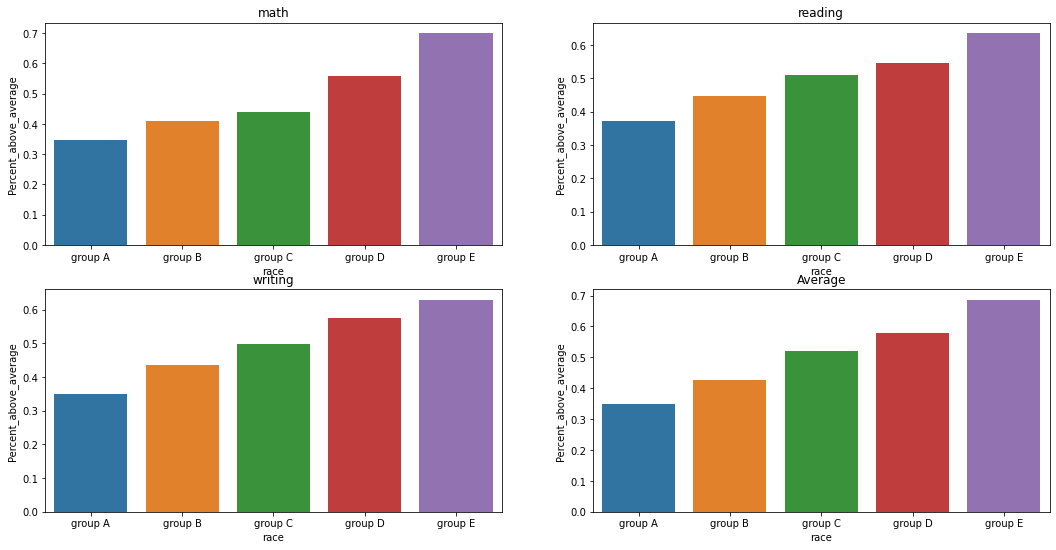

In [29]:
temp=df.groupby('race')['math_above_average'].agg(['sum','count']).reset_index()
temp['Percent_above_average']=temp['sum']/temp['count']
fig=plt.figure(figsize=(18,9))
plt.subplot(2,2,1)
plt.title('math')
sns.barplot(y=temp['Percent_above_average'],x=temp['race'])
temp=df.groupby('race')['reading_above_average'].agg(['sum','count']).reset_index()
temp['Percent_above_average']=temp['sum']/temp['count']
plt.subplot(2,2,2)
plt.title('reading')
sns.barplot(y=temp['Percent_above_average'],x=temp['race'])
temp=df.groupby('race')['writing_above_average'].agg(['sum','count']).reset_index()
temp['Percent_above_average']=temp['sum']/temp['count']
plt.subplot(2,2,3)
plt.title("writing")
sns.barplot(y=temp['Percent_above_average'],x=temp['race'])
temp=df.groupby('race')['average_above_average'].agg(['sum','count']).reset_index()
temp['Percent_above_average']=temp['sum']/temp['count']
plt.subplot(2,2,4)
plt.title("Average")
sns.barplot(y=temp['Percent_above_average'],x=temp['race'])

**Observations**
1. More percentage of Group E students are above average.
2. Very less percentage of Group A students are above average.